# Sales Analysis

In [100]:
import os
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

## Merging 12 months sales data into a single file

This section contains importing all data files and assigning them to separate dataframes. Then all sepaarte dataframes are concatonated into one dataframe. Finally it checks how many rows and columns are there in the whole dataframe

In [45]:
#Reading all files
files = [file for file in os.listdir('Dataset')]

all_months_data = pd.DataFrame()  # new dataframe to store all months

for file in files:
    df = pd.read_csv("Dataset/"+file)
    all_months_data = pd.concat([all_months_data, df])  # appending the current file to all_months_data dataframe

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [46]:
# number of rows and columns in all_months_data
all_months_data.shape 

(186850, 6)

## Cleaning data

### Dropping null values in the dataset

In [47]:
null_counts = all_months_data.isnull().sum()
print(null_counts)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [48]:
null_percentage = (545 / 186850) * 100
print(null_percentage)

0.29167781643029167


In [49]:
all_months_data = all_months_data.dropna()
print(all_months_data.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


### Dropping duplicates 

In [51]:
duplicate_count = all_months_data.duplicated().sum()
print("Duplicate rows count:", duplicate_count)

Duplicate rows count: 618


In [52]:
all_months_data.drop_duplicates(inplace=True)

In [53]:
print(all_months_data.duplicated().sum())

0


In [54]:
print(all_months_data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


### converting columns to correct type

In [57]:
# converting Quantity Ordered and Price Each columns into numeric type 
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'], errors='coerce')  
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'], errors='coerce')

# Converting 'Order Date' to datetime format
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# Drop rows where 'Order Date' is NaT
all_months_data = all_months_data.dropna(subset=['Order Date','Quantity Ordered','Order Date'])

## Augment data with additional columns

### Add month column

In [58]:
# Extracting month and add it as a new column
all_months_data['Month'] = all_months_data['Order Date'].dt.month
all_months_data['Month'] = all_months_data['Month'].astype('int32')

In [59]:
all_months_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
6,176562,USB-C Charging Cable,1.0,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4
7,176563,Bose SoundSport Headphones,1.0,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4
8,176564,USB-C Charging Cable,1.0,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4
9,176565,Macbook Pro Laptop,1.0,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4
10,176566,Wired Headphones,1.0,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4


In [60]:
all_months_data.shape

(185686, 7)

In [61]:
all_months_data = all_months_data.dropna(subset=['Order Date'])
all_months_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

### Adding a sales column

In [62]:
all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Adding a city column

In [91]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")  # using f string to format city name
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Adding hour column

In [103]:
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour
all_months_data['Minute'] = all_months_data['Order Date'].dt.minute
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


## Solving Business Questions

### 1. What was the best month of sales?

In [63]:
print(all_months_data.dtypes)

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
dtype: object


In [81]:
monthly_sales_sum = all_months_data.groupby(['Month'])['Sales'].sum()

<function matplotlib.pyplot.show(close=None, block=None)>

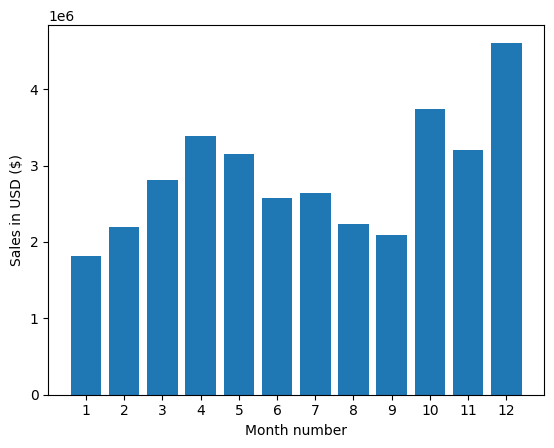

In [82]:
months = range(1,13)
plt.bar(months, monthly_sales_sum)
plt.xticks(months) #  set the locations of the x-axis ticks on a plot
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show

According to the above bar graph, we can see that the month of December is the best month of sales

### 2. What city had the highest number of sales?

In [93]:
city_sales_sum = all_months_data.groupby(['City'])['Sales'].sum()
city_sales_sum

City
Atlanta (GA)          2794199.07
Austin (TX)           1818044.33
Boston (MA)           3658627.65
Dallas (TX)           2765373.96
Los Angeles (CA)      5448304.28
New York City (NY)    4661867.14
Portland (ME)          449321.38
Portland (OR)         1870010.56
San Francisco (CA)    8254743.55
Seattle (WA)          2745046.02
Name: Sales, dtype: float64

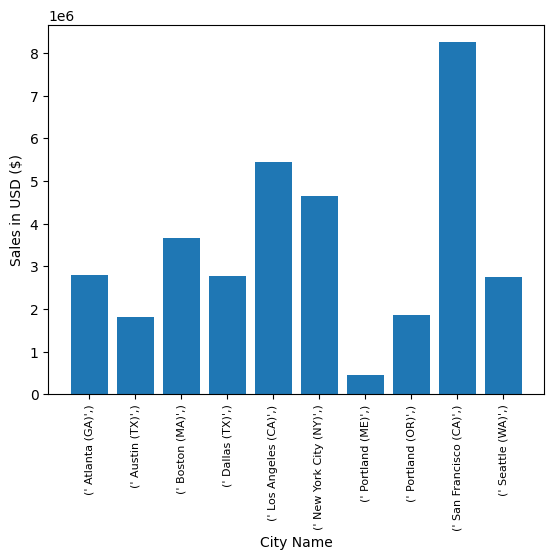

In [102]:
cities = [city for city, df in all_months_data.groupby(['City'])]

# Generate a sequence of unique tick locations
tick_locations = np.arange(len(cities))

plt.bar(tick_locations, city_sales_sum)
plt.xticks(tick_locations, cities, rotation='vertical', size=8)  # Set tick locations and labels
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

San Fransisco has the maximum number of sales

### 3. What time should we display advertisments to maximize likelihood of customer's buying product?

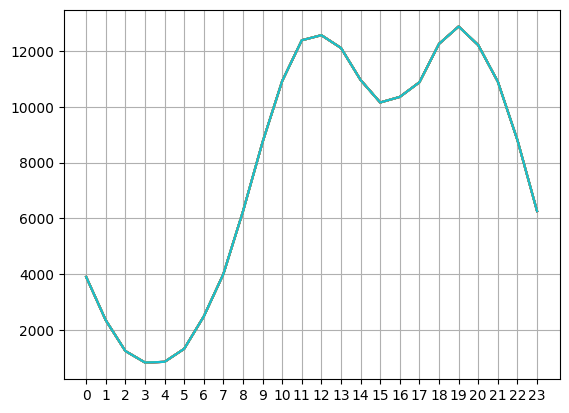

In [108]:
keys = [pair[0] for pair, df in all_months_data.groupby(['Hour'])]

plt.plot(keys, all_months_data.groupby(['Hour']).count())
plt.xticks(keys)
plt.grid()
plt.show()

The best time to display advertisments is a little time before 11 am and & 7pm

### 4. What products are the most often sold together?

In [115]:
df = all_months_data[all_months_data['Order ID'].duplicated(keep = False)].copy() #.copy() ensures that any modifications made to df do not affect the original DataFrame all_months_data

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"


In [116]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(15)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"
250,176797,"Google Phone,Bose SoundSport Headphones,Wired ..."


In [117]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### 5. What product sold the most?

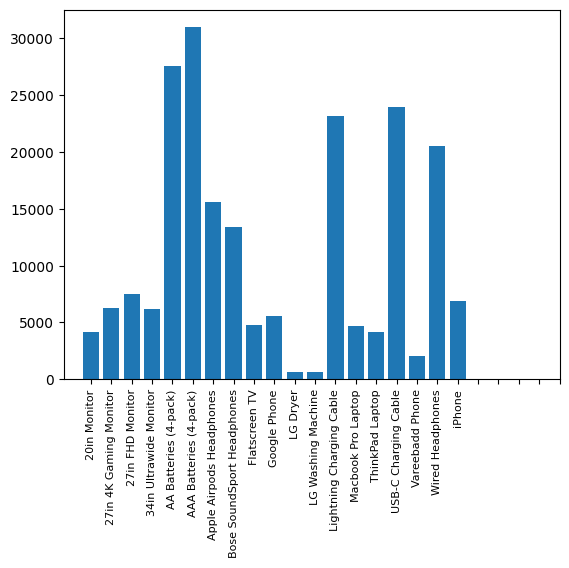

In [122]:
quantity_ordered = all_months_data.groupby('Product')['Quantity Ordered'].sum()

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [121]:
all_months_data.dtypes


Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
Hour                         int32
Minute                       int32
dtype: object